1. Load the data
2. Assess target variable distribution
3. Explore distribution and information value of individual features using a pairplot
4. Rescale the data for analysis

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [0]:
diabetes=load_diabetes()

In [0]:
# Load the data
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

In [0]:
# Convert y to binary values (0 or 1)
y = np.where(y > 150, 1, 0)

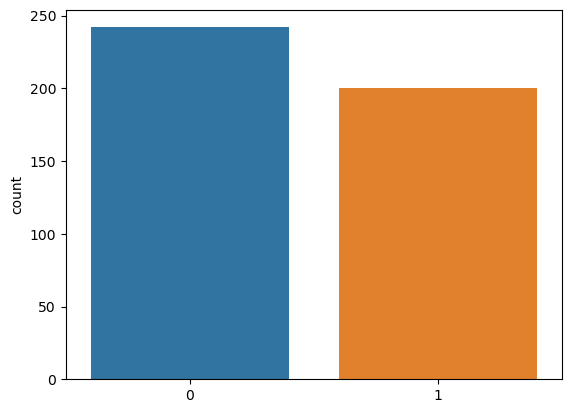

In [0]:
# Assess target variable distribution
sns.countplot(x=y)
plt.show()

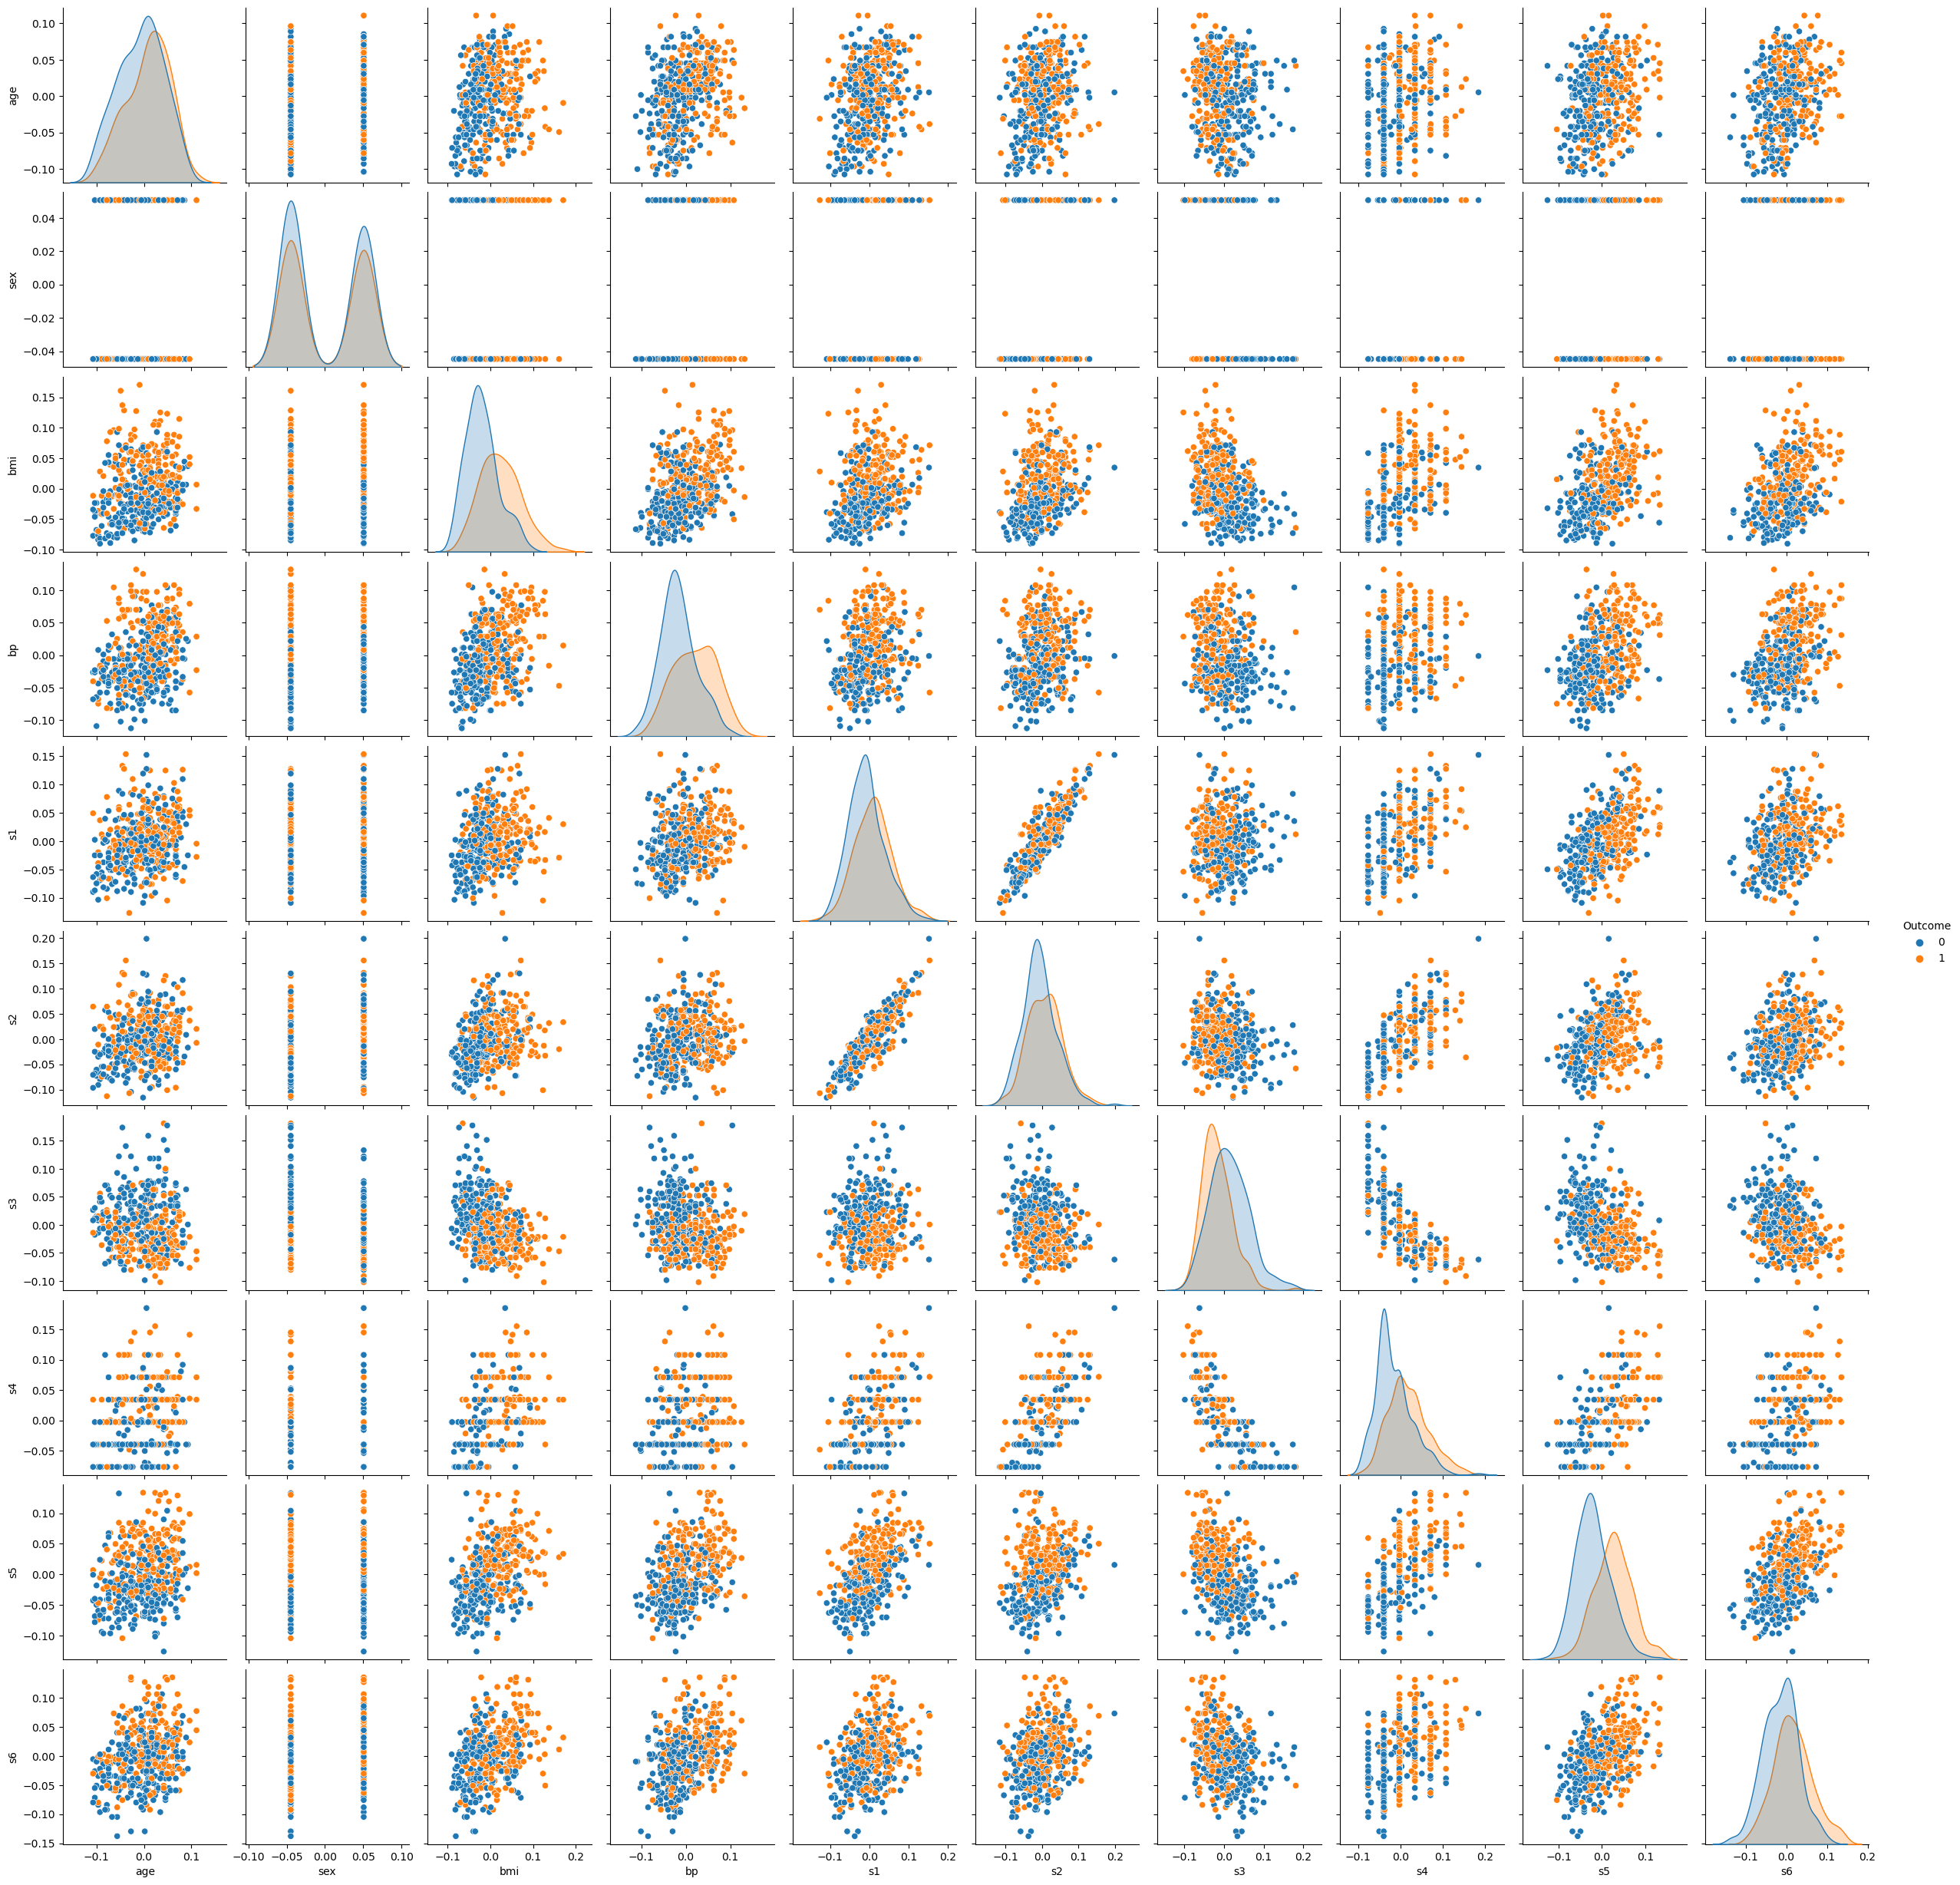

In [0]:
# Explore the distribution and information value of individual features using a pairplot
df = pd.DataFrame(X, columns=diabetes.feature_names)
df['Outcome'] = y
sns.pairplot(df, hue='Outcome')

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

5. Develop a kNN model to predict diabetes occurence using k = 5
6. Determine the optimal value of k based on the ROC AUC (Hint: scoring="roc_auc")

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [0]:
from sklearn.metrics import roc_auc_score

print('ROC AUC: ', roc_auc_score(y_test,y_pred))
params = {'n_neighbors': range(1, 31)}
grid = GridSearchCV(knn, params, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)
print('Best k:', grid.best_params_['n_neighbors'])
y_pred_proba = grid.predict_proba(X_test)[:, 1]
print('ROC AUC:', roc_auc_score(y_test, y_pred_proba))

ROC AUC:  0.6644827586206897
Best k: 28
ROC AUC: 0.791264367816092


In [0]:
from sklearn.metrics import roc_auc_score

print('ROC AUC: ', roc_auc_score(y_test,y_pred))

ROC AUC:  0.6644827586206897


7. Compare the optimized kNN model performance vis-a-vis logistic regression model from last week across the following metrics: Recall, Precision, F1, ROC AUC. Which is the better model based on each metric?

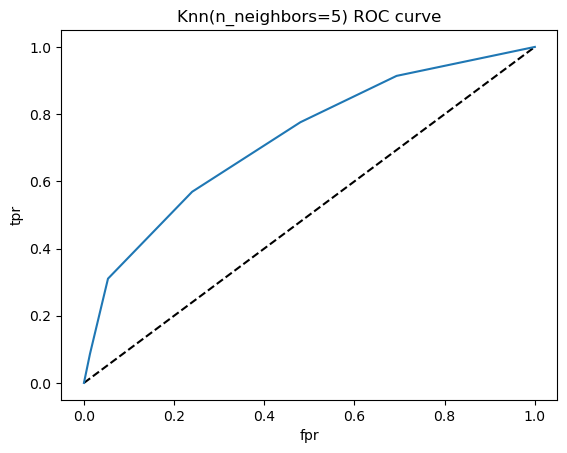

0.725632183908046

In [0]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=5) ROC curve')
plt.show()

#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

In [0]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[57 18]
 [25 33]]
              precision    recall  f1-score   support

           0       0.70      0.76      0.73        75
           1       0.65      0.57      0.61        58

    accuracy                           0.68       133
   macro avg       0.67      0.66      0.67       133
weighted avg       0.67      0.68      0.67       133



Based on the results the Logistic model is the best model.